In [1]:
import numpy as np
import pandas as pd

missing values: in most of the cases, real world data comes in incpmplete or with some data points unabvle to be captured.
    
    

In [50]:
data = pd.read_csv(r"C:\Users\97798\Desktop\diabetes.csv")

In [51]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [52]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [23]:
data.Pregnancies[0] = np.nan

C:\Users\97798\AppData\Local\Temp\ipykernel_14200\3871322101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Pregnancies[0] = np.nan


In [6]:
import seaborn as sns

In [25]:
cols = data.columns

In [26]:
cols


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [27]:
missing_numbers = (data[cols] == 0).sum()
print(missing_numbers)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


Replacing Missing values (0) values with nan

In [28]:
data[cols] = data[cols].replace(0, np.nan)

In [29]:
data.isna().sum()

Pregnancies                 112
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [30]:
data.head(15
         )

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,NaN,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,NaN
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,NaN
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0
5,5.0,116.0,74.0,NaN,NaN,25.6,0.201,30,NaN
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1.0
7,10.0,115.0,NaN,NaN,NaN,35.3,0.134,29,NaN
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53,1.0
9,8.0,125.0,96.0,NaN,NaN,NaN,0.232,54,1.0


<AxesSubplot:>

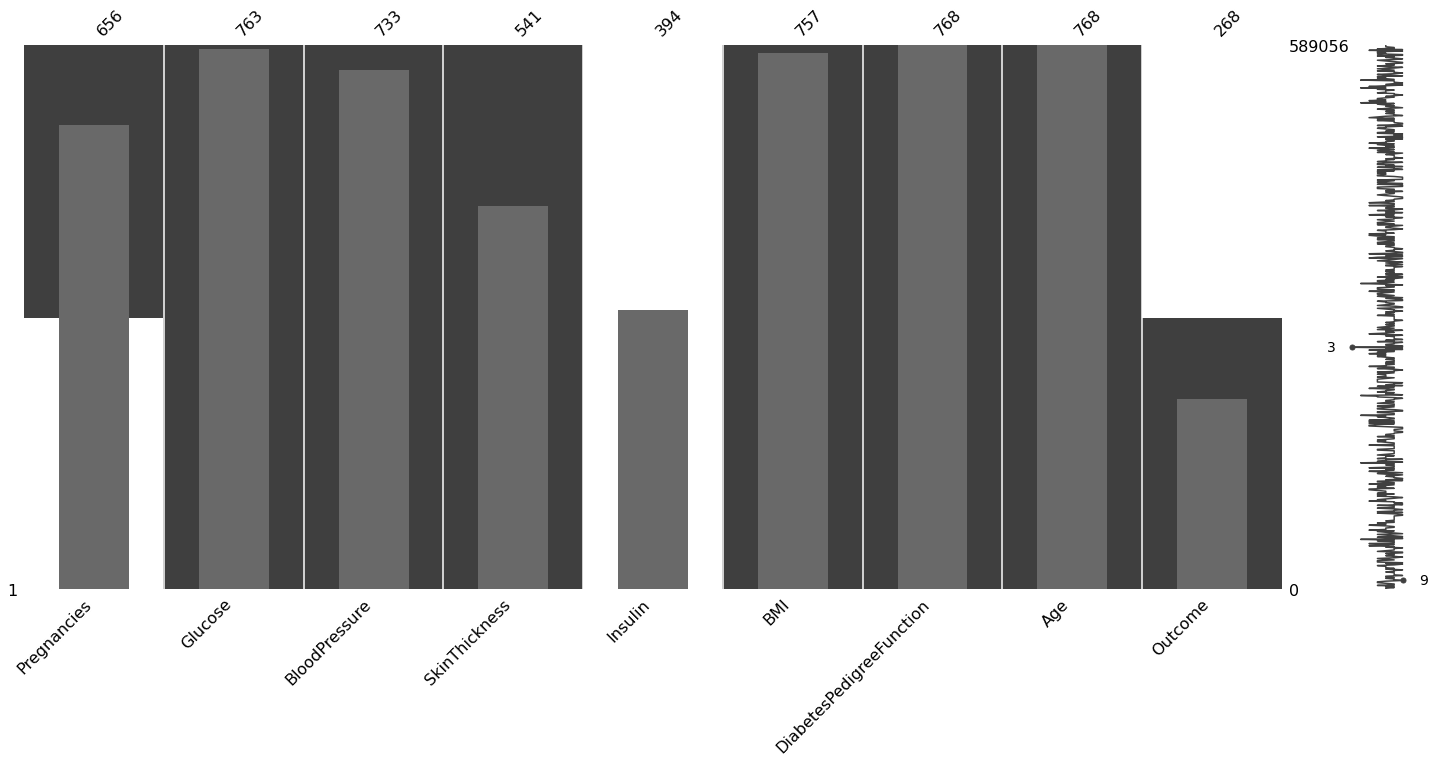

In [31]:
import missingno as msno

msno.matrix(data)
msno.bar(data)

In [32]:
# Simple imputer

In [33]:
from sklearn.impute import SimpleImputer

# define the imputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# transform the dataset
transformed_values = imputer.fit_transform(values)

print('Missing: %d' % np.isnan(transformed_values).sum())

Missing: 0


In [53]:
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# df1 = pd.read_csv(r"C:\Users\97798\Desktop\diabetes.csv")

data = data.replace(0, np.nan)

values = df1.values

x = values[:,0:8]

y = values[:,8]

imputer = SimpleImputer(missing_values=np.nan, strategy='mode')

lda = LinearDiscriminantAnalysis()

pipeline = Pipeline(steps=[('imputer', imputer),('model',lda)])

kfold = KFold(n_splits=4, shuffle=True, random_state=15)

result = cross_val_score(pipeline, x, y, cv = kfold, scoring = 'accuracy')

print('Acuuracy: %.2f' % result.mean())

Acuuracy: nan


C:\Users\97798\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
4 fits failed out of a total of 4.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\97798\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\97798\anaconda3\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\97798\anaconda3\lib\site-packages\sklearn\pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\97798\anaconda3\

In [45]:
data.isna().sum()

Pregnancies                 112
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [36]:
df1.isna().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64